Courtesy: [This notebook](https://github.com/microsoft/interpret/blob/master/examples/notebooks/Interpretable%20Classification%20Methods.ipynb) by the Microsoft Interpret team.

# Setup a classification experiment

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None)
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

# Explore the dataset

In [2]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

# Train the Explainable Boosting Machine (EBM)

In [4]:
import time

In [5]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier(random_state=seed)
start = time.time()
ebm.fit(X_train, y_train)   
print('It takes {} seconds'.format(time.time()-start))

It takes 246.30056929588318 seconds


# Global Explanations: What the model learned overall

In [6]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

# Local Explanations: How an individual prediction was made

In [7]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

# Evaluate EBM performance

In [8]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

In [12]:
from collections import Counter

print('In the training set', Counter(y_train).most_common())
print('\nIn the testing set', Counter(y_test).most_common())

In the training set [(0, 19694), (1, 6354)]

In the testing set [(0, 5026), (1, 1487)]


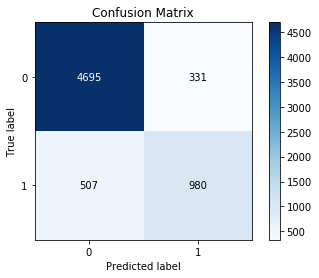

In [11]:
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline 

preds = ebm.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, preds)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8713342545677875